In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

ModuleNotFoundError: No module named 'scipy'

In [1]:
def prepare_hume_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral', 'hume_start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    return df_facial
    

In [2]:
def prepare_fer_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral', 'fer_start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    return df_facial
    

In [27]:
def compare_csv_data(df1_name_hume, df2_name):
    # Read the CSV files into pandas DataFrames
    df1 = df1_name_hume
    df2 = pd.read_csv(df2_name)
    
    # Extract the emotion columns from each DataFrame
    emotions = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
    
    # Iterate over the emotion columns and plot the data for each file
    for emotion in emotions:
        plt.figure()
        plt.plot(df1['start_patch'], df1[emotion], label= str('hume'))
        plt.plot(df2['start_patch'], df2[emotion], label= str(df2_name))
        plt.xlabel('Timestamp')
        plt.ylabel('Score')
        plt.title('Comparison of ' + emotion)
        plt.legend()
        plt.show()


In [ ]:
def get_correlations_with_binary(df, binary_feature, continuous_features, corr_func= pearson ):
    df = df.dropna()
    correlation_data = []
    for feature in continuous_features:
        corr, p_value = corr_func(df[feature], df[binary_feature])
        correlation_data.append((feature, corr, p_value))
    
    data = correlation_data
    # Extract feature names, correlations, and p-values
    features = [item[0] for item in data]
    correlations = [item[1] for item in data]
    p_values = [item[2] for item in data]

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the correlations as vertical bars
    ax.bar(features, correlations, color='steelblue')

    # Set the y-axis label
    ax.set_ylabel('Correlation')

    # Add horizontal gridlines
    ax.yaxis.grid(True)

    # Set the title
    ax.set_title('Correlation with Binary Variable')

    # Add error bars representing p-values
    ax.errorbar(features, correlations, yerr=np.abs(correlations), fmt='none', color='black', capsize=5, label='p-value')

    # Add p-values and absolute correlation values as text annotations
    for feature, correlation, p_value in zip(features, correlations, p_values):
        ax.text(feature, 0, f'p={p_value:.2f}', ha='center', va='bottom')
        ax.text(feature, correlation, f'{abs(correlation):.2f}', ha='center', va='top')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.tight_layout()
    plt.show()
    return data

In [37]:
df_hume_1 = prepare_hume_data('../data/hume/processed/Cuban_vocals_afternoon.csv')

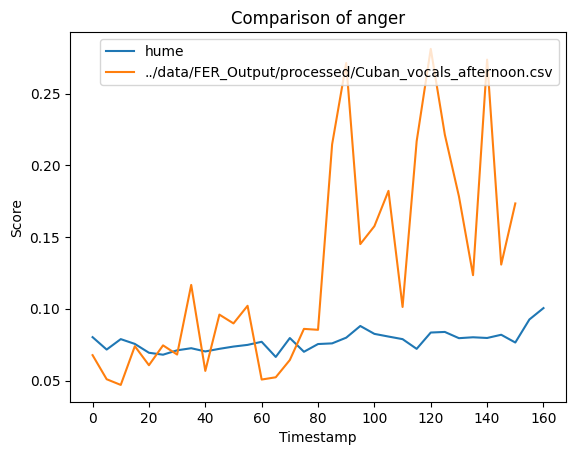

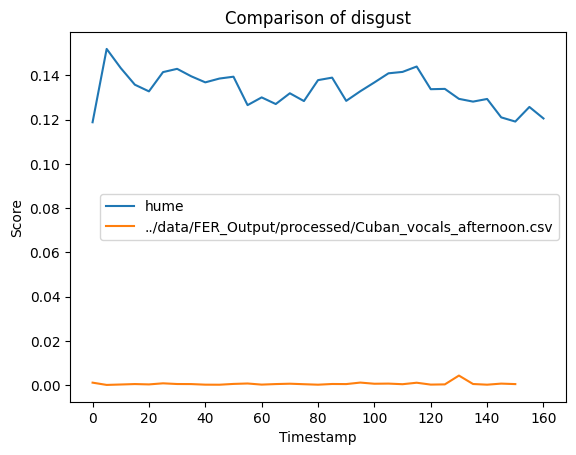

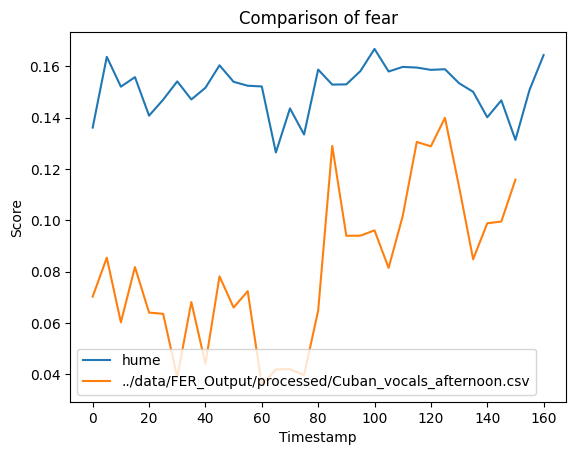

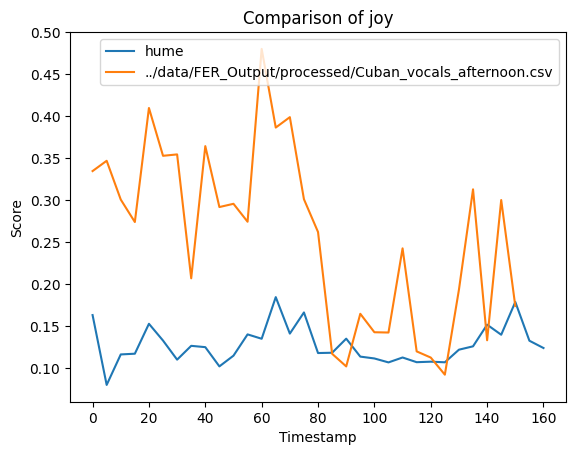

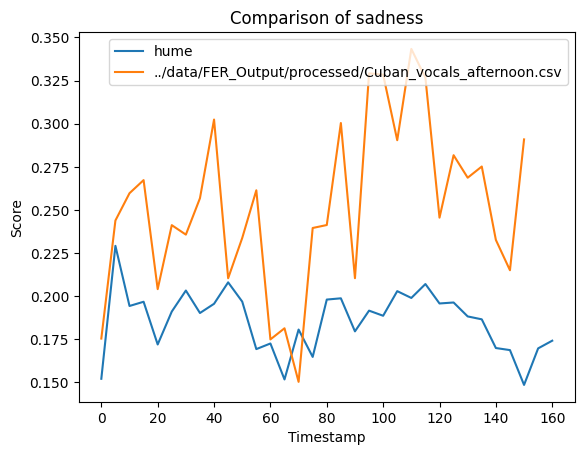

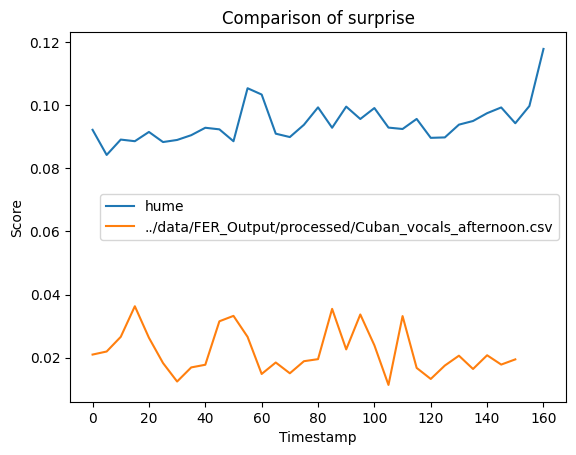

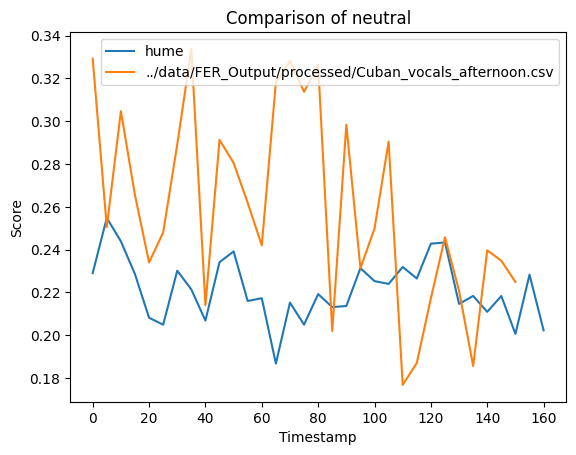

In [39]:
compare_csv_data(df_hume_1, '../data/FER_Output/processed/Cuban_vocals_afternoon.csv')

In [40]:
df_hume_2 = prepare_hume_data('../data/hume/processed/Cuban_vocals_morning.csv')

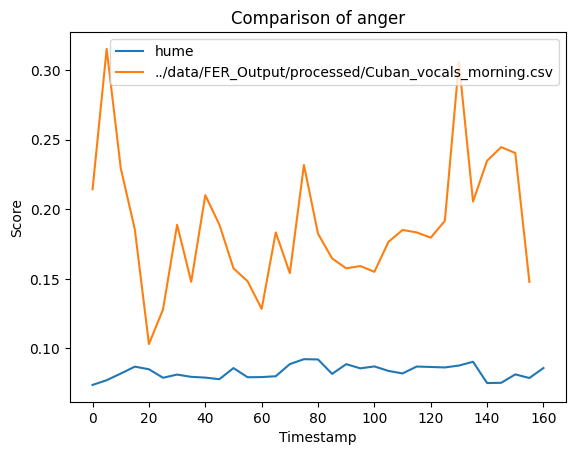

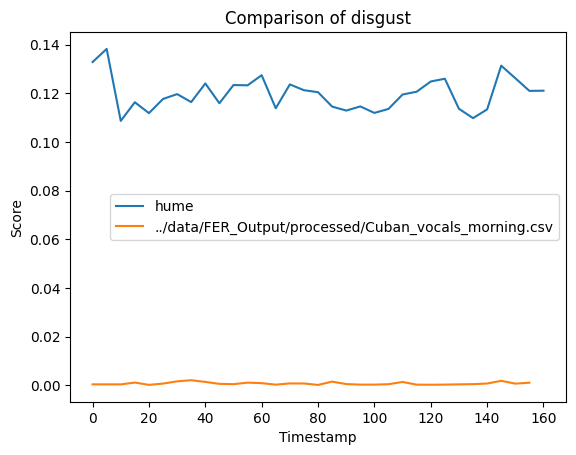

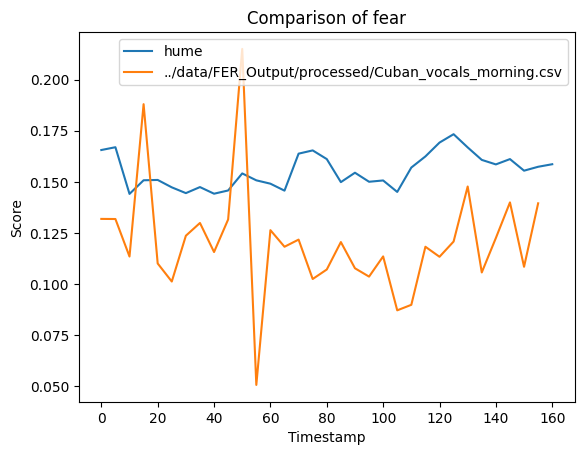

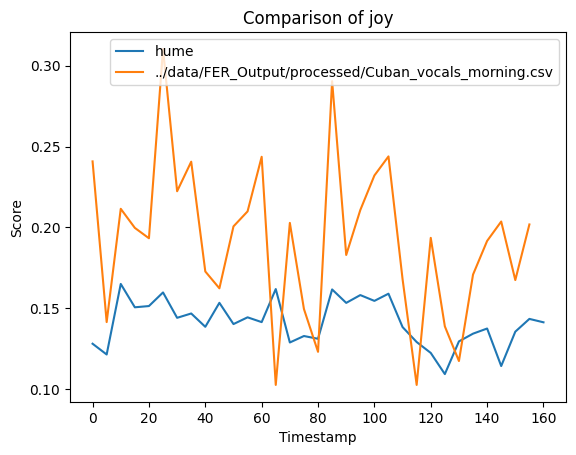

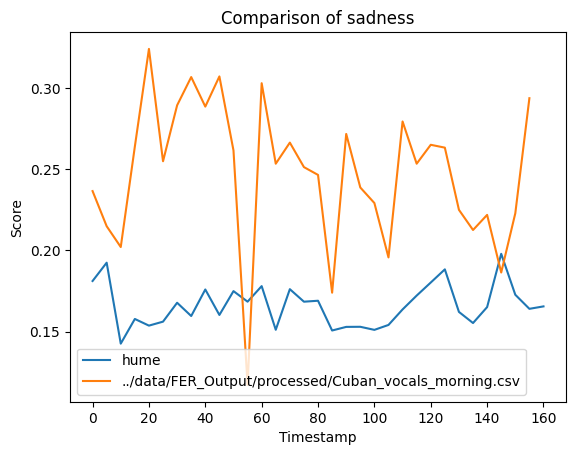

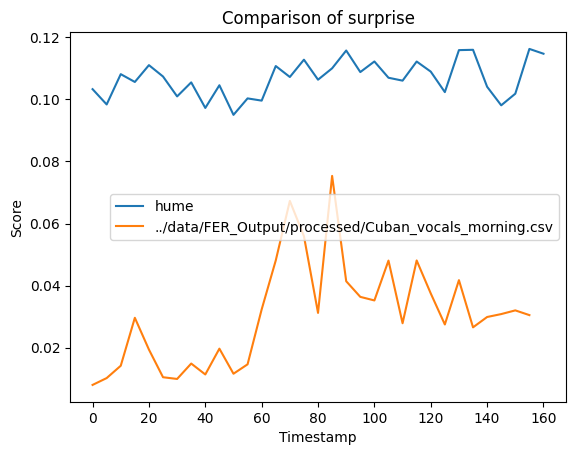

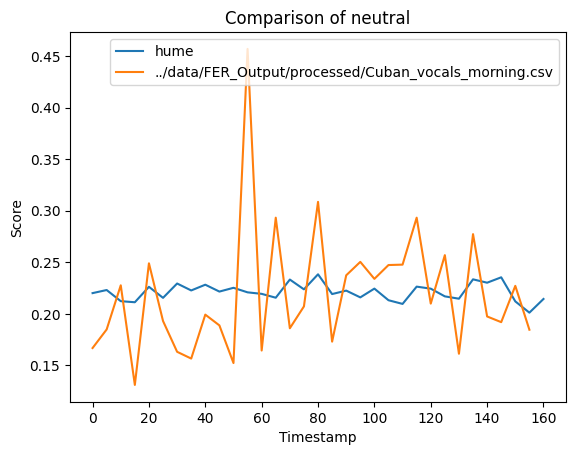

In [41]:
compare_csv_data(df_hume_2, '../data/FER_Output/processed/Cuban_vocals_morning.csv')

In [43]:
df_hume_3 = prepare_hume_data('../data/hume/processed/Funk_band_morning.csv')

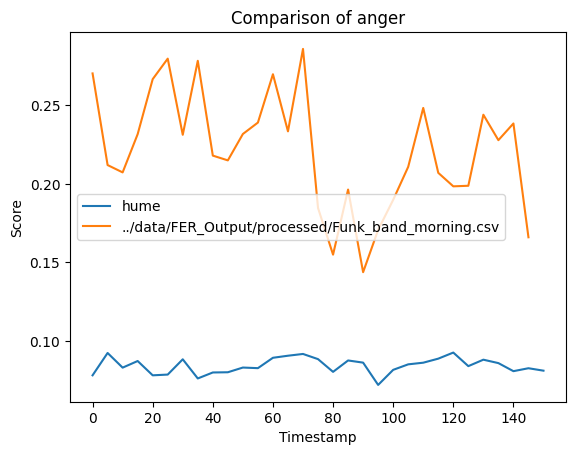

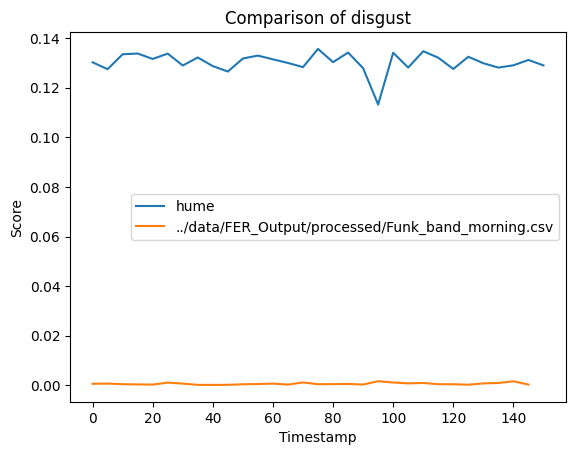

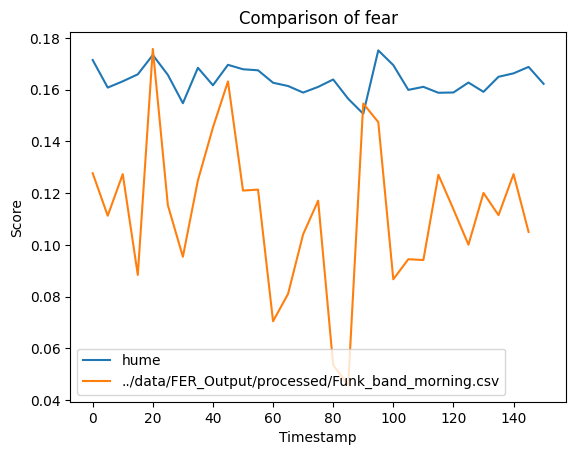

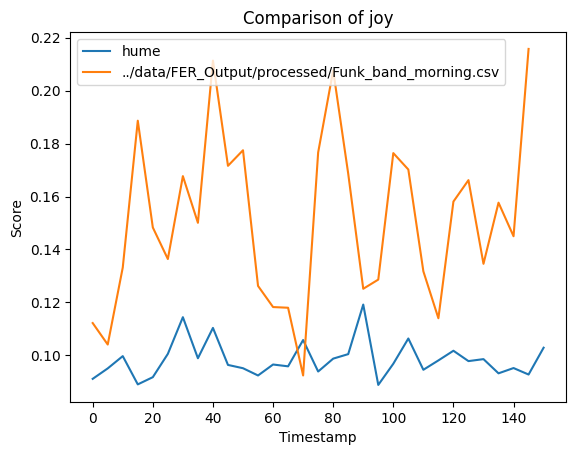

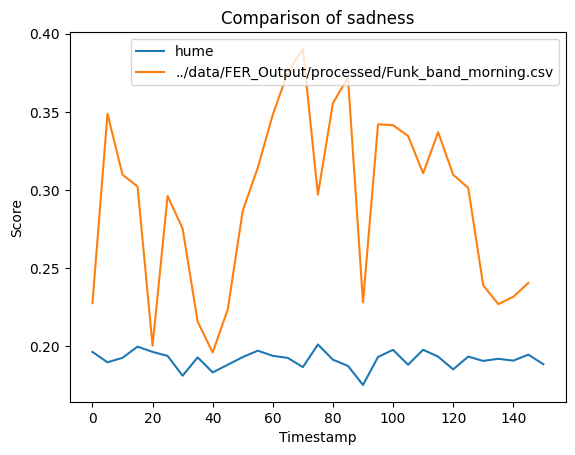

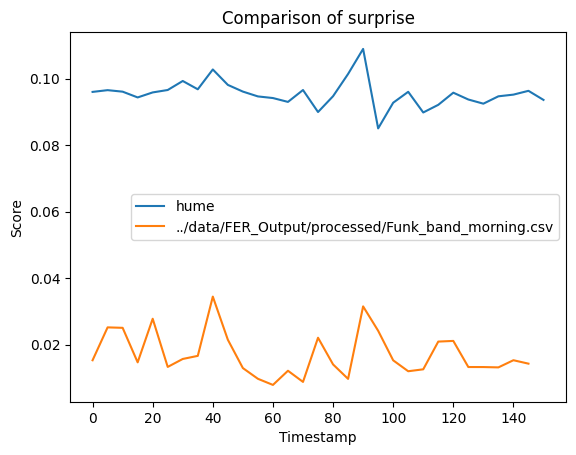

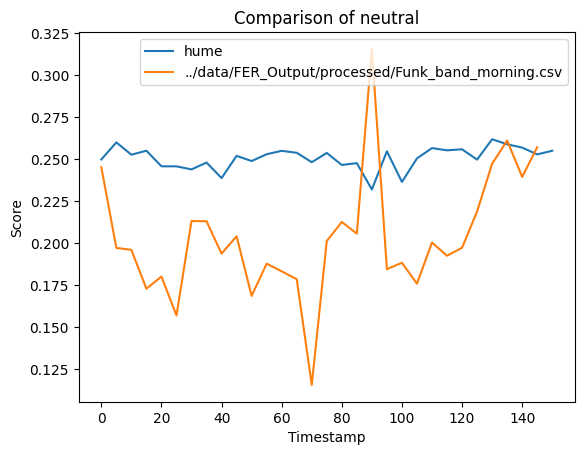

In [44]:
compare_csv_data(df_hume_3, '../data/FER_Output/processed/Funk_band_morning.csv')

In [45]:
df_hume_4 = prepare_hume_data('../data/hume/processed/Funk_rhythm_morning.csv')

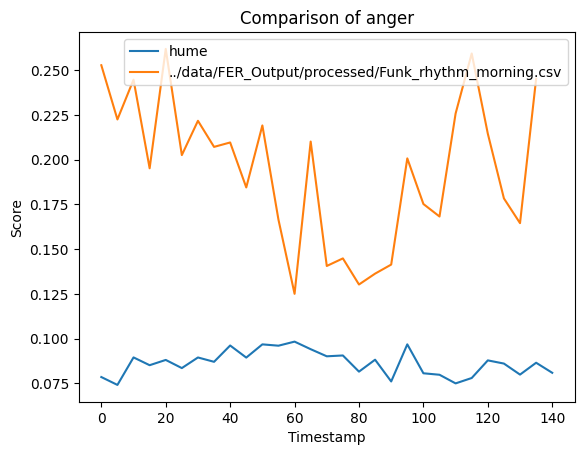

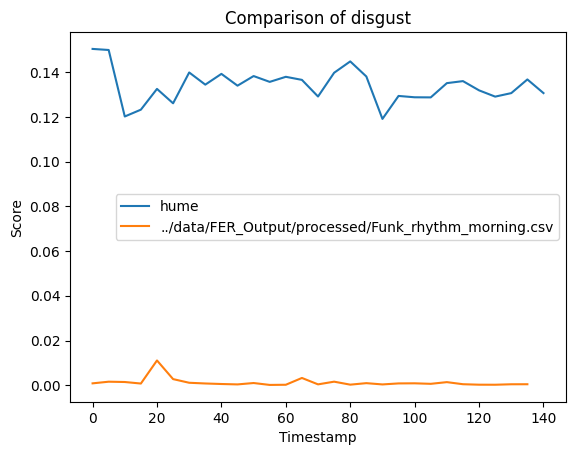

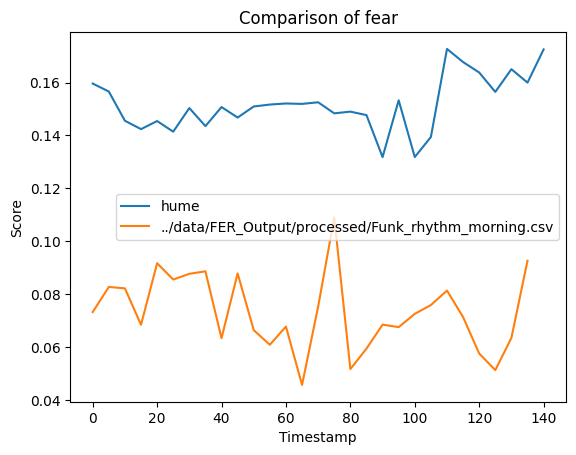

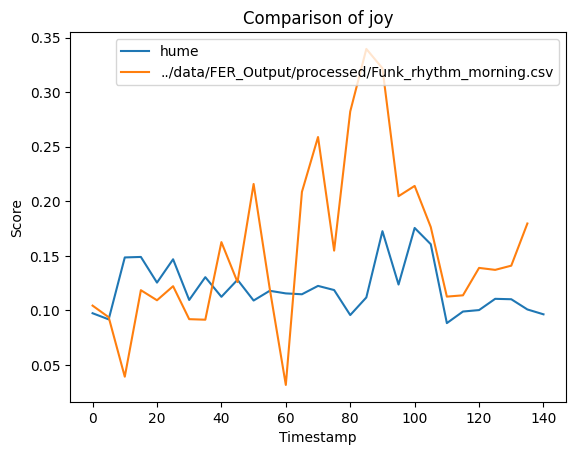

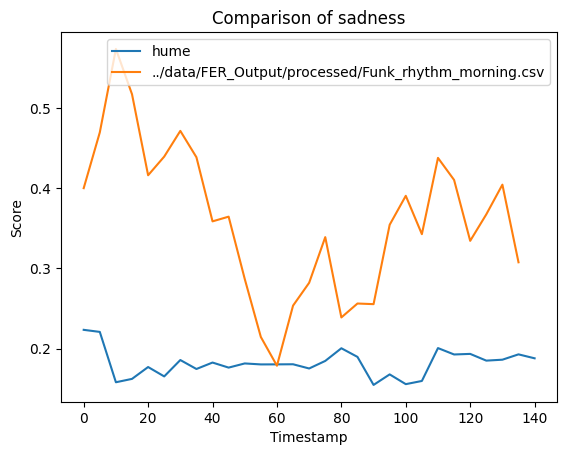

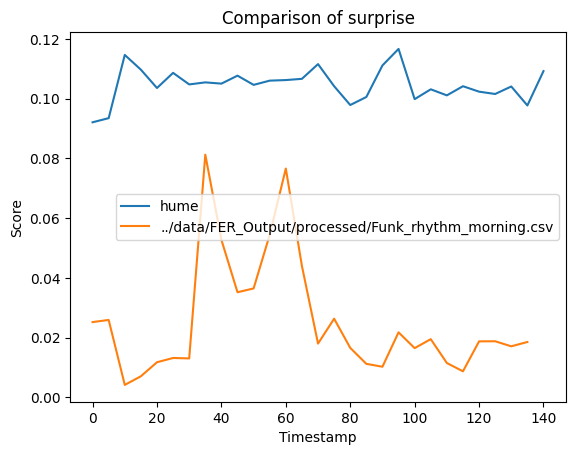

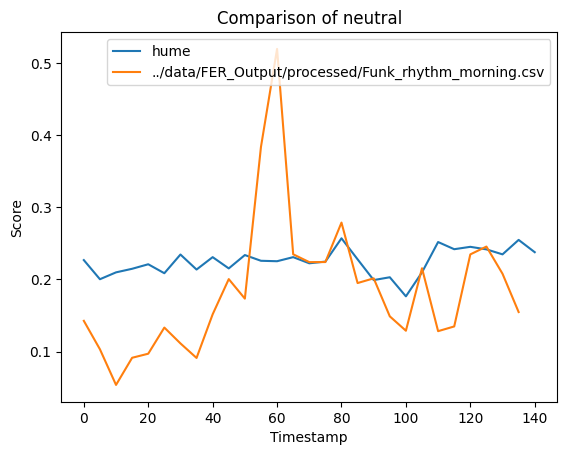

In [46]:
compare_csv_data(df_hume_4, '../data/FER_Output/processed/Funk_rhythm_morning.csv')